In [1]:
file = "../DataSets Grandes/Covid/Covid19Casos.csv"
print("Datos actualizados al 30/4/21")
## Fuente: https://datos.gob.ar/dataset/salud-covid-19-casos-registrados-republica-argentina/archivo/salud_fd657d02-a33a-498b-a91b-2ef1a68b8d16

Datos actualizados al 30/4/21


In [296]:
file_vacunas = '../DataSets Grandes/Covid/datos_vacunados_covid19.csv'
print("Datos actualizados al",today)

Datos actualizados al 2021-05-01


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
data = pd.read_csv(file)

In [360]:
data_vacunas = pd.read_csv(file_vacunas)

In [4]:
data.head(4)

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2021-04-30
1,10000000,F,52.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,2,2021-04-08,0,2021-04-30
2,10000001,F,22.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-05,2021-04-08,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2021-04-08,490,2021-04-30
3,10000002,F,43.0,Años,Argentina,Buenos Aires,La Matanza,CABA,NaN,2021-04-08,...,NaN,NO,2,Público,Caso Descartado,Descartado,6,2021-04-06,427,2021-04-30


In [298]:
data_vacunas.head(4)

,sexo,grupo_etario,jurisdiccion_residencia,jurisdiccion_residencia_id,depto_residencia,depto_residencia_id,jurisdiccion_aplicacion,jurisdiccion_aplicacion_id,depto_aplicacion,depto_aplicacion_id,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis,lote_vacuna
0,M,60-69,Buenos Aires,6,Bahía Blanca,56,Buenos Aires,6,Bahía Blanca,56,2021-04-07,Sinopharm,>60,1,2021010048
1,M,50-59,Buenos Aires,6,Coronel de Marina L. Rosales,182,Buenos Aires,6,Coronel de Marina L. Rosales,182,2021-03-24,Sinopharm,Riesgo,1,2021010048
2,M,60-69,Buenos Aires,6,Morón,568,Buenos Aires,6,Morón,568,2021-04-09,Sinopharm,>60,1,2021030209
3,M,50-59,Buenos Aires,6,Hurlingham,408,Buenos Aires,6,Hurlingham,408,2021-03-05,Sinopharm,Estratégico,1,2021010036


In [ ]:
data_vacunas.drop(columns=['depto_residencia_id', 'depto_aplicacion_id','jurisdiccion_residencia_id','jurisdiccion_aplicacion_id','lote_vacuna'], inplace=True)
data_vacunas.sample(3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914857 entries, 0 to 9914856
Data columns (total 25 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id_evento_caso                    int64  
 1   sexo                              object 
 2   edad                              float64
 3   edad_años_meses                   object 
 4   residencia_pais_nombre            object 
 5   residencia_provincia_nombre       object 
 6   residencia_departamento_nombre    object 
 7   carga_provincia_nombre            object 
 8   fecha_inicio_sintomas             object 
 9   fecha_apertura                    object 
 10  sepi_apertura                     int64  
 11  fecha_internacion                 object 
 12  cuidado_intensivo                 object 
 13  fecha_cui_intensivo               object 
 14  fallecido                         object 
 15  fecha_fallecimiento               object 
 16  asistencia_respiratoria_mecanica  ob

In [6]:
data.isnull().sum()

id_evento_caso                            0
sexo                                      0
edad                                   4641
edad_años_meses                           0
residencia_pais_nombre                    0
residencia_provincia_nombre               0
residencia_departamento_nombre            0
carga_provincia_nombre                    0
fecha_inicio_sintomas               6159514
fecha_apertura                            2
sepi_apertura                             0
fecha_internacion                   9613635
cuidado_intensivo                         0
fecha_cui_intensivo                 9864752
fallecido                                 0
fecha_fallecimiento                 9837930
asistencia_respiratoria_mecanica          0
carga_provincia_id                        0
origen_financiamiento                     0
clasificacion                             0
clasificacion_resumen                     0
residencia_provincia_id                   0
fecha_diagnostico               

In [7]:
data.shape

(9914857, 25)

In [8]:
data.columns

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'carga_provincia_id', 'origen_financiamiento', 'clasificacion',
       'clasificacion_resumen', 'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'],
      dtype='object')

In [18]:
data = data.drop(columns = ["carga_provincia_id","residencia_provincia_id","residencia_departamento_id","id_evento_caso","asistencia_respiratoria_mecanica","fecha_inicio_sintomas","fecha_internacion"])

In [10]:
data.shape

(9914857, 18)

In [11]:
data.head(5)

,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_apertura,sepi_apertura,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico,ultima_actualizacion
0,M,54.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,2020-06-01,23,NO,NaN,NO,NaN,Privado,Caso Descartado,Descartado,2020-06-09,2021-04-30
1,F,52.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-04-30
2,F,22.0,Años,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-04-30
3,F,43.0,Años,Argentina,Buenos Aires,La Matanza,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-06,2021-04-30
4,F,33.0,Años,Argentina,CABA,COMUNA 01,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-04-30


In [19]:
data[['edad', 'edad_años_meses','clasificacion_resumen','fallecido']][data.edad_años_meses != 'Años'].groupby('fallecido').sum()

,edad
fallecido,
NO,190988.0
SI,505.0


In [13]:
## Quitamos los menores de 1 año del DS porque tienen una mortalidad muy baja y las causas podrían haber sido de otra índole ajena al COVID

In [20]:
data = data[data.edad_años_meses == 'Años']
data = data.drop(columns = "edad_años_meses")
data.head(5)

,sexo,edad,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_apertura,sepi_apertura,cuidado_intensivo,fecha_cui_intensivo,fallecido,fecha_fallecimiento,origen_financiamiento,clasificacion,clasificacion_resumen,fecha_diagnostico,ultima_actualizacion
0,M,54.0,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,2020-06-01,23,NO,NaN,NO,NaN,Privado,Caso Descartado,Descartado,2020-06-09,2021-04-30
1,F,52.0,Argentina,CABA,SIN ESPECIFICAR,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-04-30
2,F,22.0,Argentina,Buenos Aires,Lomas de Zamora,Buenos Aires,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-04-30
3,F,43.0,Argentina,Buenos Aires,La Matanza,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-06,2021-04-30
4,F,33.0,Argentina,CABA,COMUNA 01,CABA,2021-04-08,14,NO,NaN,NO,NaN,Público,Caso Descartado,Descartado,2021-04-08,2021-04-30


In [21]:
data.clasificacion.value_counts()

Caso Descartado                                                                              6055928
Caso confirmado por laboratorio - No activo (por tiempo de evolución)                        2298106
Caso con resultado negativo-no conclusivo - No activo                                         385579
Caso confirmado por criterio clínico-epidemiológico - No activo (por tiempo de evolución)     256674
Caso sospechoso - No Activo - Con muestra sin resultado concluyente                           172124
Caso sospechoso - No Activo - Sin muestra                                                     159212
Caso confirmado por laboratorio - Activo                                                      135678
Caso confirmado por laboratorio - Activo Internado                                            125942
Caso confirmado por laboratorio - No Activo por criterio de laboratorio                        76703
Caso confirmado por laboratorio - Fallecido                                                

In [172]:
#data.fecha_diagnostico.dropna(inplace=True)

In [22]:
data.clasificacion_resumen[data.fecha_diagnostico.isna()==False].value_counts(normalize=True)

Descartado    0.658038
Confirmado    0.294845
Sospechoso    0.047117
Name: clasificacion_resumen, dtype: float64

In [23]:
data.clasificacion_resumen.value_counts(normalize=True)

Descartado        0.614276
Confirmado        0.300680
Sospechoso        0.085020
Sin Clasificar    0.000024
Name: clasificacion_resumen, dtype: float64

In [24]:
#Regex
caso_conf = "Caso confirmado"
caso_sosp = "Caso sospechoso"
caso_desc = "Caso Descartado"
reg_caso_conf = re.compile(caso_conf)
reg_caso_sosp = re.compile(caso_sosp)
reg_caso_desc = re.compile(caso_desc)

In [25]:
re.findall(reg_caso_conf,data.clasificacion[0])

[]

In [26]:
re.findall(caso_desc,data.clasificacion[0])

['Caso Descartado']

In [27]:
print (caso_conf in data.clasificacion[0])
print (caso_desc in data.clasificacion[0])

False
True


In [28]:
data.clasificacion_resumen.value_counts()

Descartado        6074759
Confirmado        2973509
Sospechoso         840784
Sin Clasificar        241
Name: clasificacion_resumen, dtype: int64

In [29]:
print ("Mortalidad entre los casos positivos:")
data.fallecido[data.clasificacion_resumen=="Confirmado"].value_counts(normalize=True)

Mortalidad entre los casos positivos:


NO    0.978532
SI    0.021468
Name: fallecido, dtype: float64

In [30]:
data.edad[data.edad>110].value_counts()

121.0    431
120.0     35
221.0     27
111.0     13
119.0      4
112.0      3
113.0      2
118.0      2
114.0      2
115.0      1
117.0      1
Name: edad, dtype: int64

In [31]:
# Eliminamos personas con más de 110 años al considerarlos outliers ya que representan una cantidad muy baja respecto al total analizado
data.drop(index=data.edad[data.edad>110].index, inplace=True)

In [ ]:
#plt.hist(data.estado(data.estado==casosconf),cumulative=True, density=True, bins=30)

In [169]:
tot = pd.Series(data.fecha_diagnostico[data.clasificacion_resumen=="Confirmado"].value_counts()).sort_index()
tot = tot[tot.index > '2020-03-06']

In [170]:
# Armar lista o serie con el total de registros por día de testeo
tot_tests = pd.Series(data.sexo.groupby(data.fecha_diagnostico).count())
tot_tests = tot_tests[tot_tests.index > '2020-03-06']

In [180]:
totales = pd.DataFrame(tot)

In [183]:
totales = totales.rename(columns= {'fecha_diagnostico':'Cantidad Confirmados'})

In [184]:
totales['Cantidad Testeados'] = tot_tests

In [ ]:
totales['fecha_diag'] = totales.index

In [186]:
# Casos acumulados
cumsum_tot = totales['Cantidad Confirmados'].cumsum()
cumsum_tot = cumsum_tot[cumsum_tot.index > '2020-03-06']
cumsum_tot.index = pd.to_datetime(cumsum_tot.index, format="%Y/%m/%d")
totales['Cantidad Acumulada Confirmados'] = cumsum_tot
totales

In [683]:
totales = totales.join(pd.Series(data_vacunas.fecha_aplicacion.rename('Vacunados').groupby(data_vacunas.fecha_aplicacion).count()), how = 'left')

In [685]:
totales.Vacunados.replace(to_replace=np.NaN, value=0, inplace=True)

In [780]:
cumsum_vac = totales['Vacunados'].cumsum()
cumsum_vac = cumsum_vac[cumsum_vac.index > '2020-03-06']
cumsum_vac.index = pd.to_datetime(cumsum_vac.index, format="%Y/%m/%d")
totales['Vacunados Acumulados'] = cumsum_vac

In [ ]:
#y_vac = totales['Vacunados'][totales.fecha_diag[totales.fecha_diag.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]]

In [189]:
pd.cut(totales.index, bins = 6)

[(2020-03-06 13:56:38.400000, 2020-05-15 20:00:00], (2020-03-06 13:56:38.400000, 2020-05-15 20:00:00], (2020-03-06 13:56:38.400000, 2020-05-15 20:00:00], (2020-03-06 13:56:38.400000, 2020-05-15 20:00:00], (2020-03-06 13:56:38.400000, 2020-05-15 20:00:00], ..., (2021-02-19 04:00:00, 2021-04-30], (2021-02-19 04:00:00, 2021-04-30], (2021-02-19 04:00:00, 2021-04-30], (2021-02-19 04:00:00, 2021-04-30], (2021-02-19 04:00:00, 2021-04-30]]
Length: 420
Categories (6, interval[datetime64[ns]]): [(2020-03-06 13:56:38.400000, 2020-05-15 20:00:00] < (2020-05-15 20:00:00, 2020-07-24 16:00:00] < (2020-07-24 16:00:00, 2020-10-02 12:00:00] < (2020-10-02 12:00:00, 2020-12-11 08:00:00] < (2020-12-11 08:00:00, 2021-02-19 04:00:00] < (2021-02-19 04:00:00, 2021-04-30]]

In [190]:
totales.index

DatetimeIndex(['2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16',
               ...
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30'],
              dtype='datetime64[ns]', length=420, freq=None)

### Vacunas

In [303]:
data_vacunas.head()

,sexo,grupo_etario,jurisdiccion_residencia,depto_residencia,jurisdiccion_aplicacion,depto_aplicacion,fecha_aplicacion,vacuna,condicion_aplicacion,orden_dosis
0,M,60-69,Buenos Aires,Bahía Blanca,Buenos Aires,Bahía Blanca,2021-04-07,Sinopharm,>60,1
1,M,50-59,Buenos Aires,Coronel de Marina L. Rosales,Buenos Aires,Coronel de Marina L. Rosales,2021-03-24,Sinopharm,Riesgo,1
2,M,60-69,Buenos Aires,Morón,Buenos Aires,Morón,2021-04-09,Sinopharm,>60,1
3,M,50-59,Buenos Aires,Hurlingham,Buenos Aires,Hurlingham,2021-03-05,Sinopharm,Estratégico,1
4,M,60-69,Buenos Aires,Pilar,Buenos Aires,Pilar,2021-04-12,Sinopharm,>60,1


In [365]:
data_vacunas = data_vacunas[data_vacunas.fecha_aplicacion!='S.I.']

In [367]:
fechas_vacunas = data_vacunas.fecha_aplicacion.drop_duplicates().sort_values()

In [491]:
data_vacunas.fecha_aplicacion.groupby(data_vacunas.fecha_aplicacion).count().sort_index()

fecha_aplicacion
2020-12-29     20427
2020-12-30     20026
2020-12-31      2809
2021-01-01       119
2021-01-02      3296
               ...  
2021-04-27    141041
2021-04-28    142290
2021-04-29    135132
2021-04-30     89411
2021-05-01         2
Name: fecha_aplicacion, Length: 124, dtype: int64

# Graficado

In [488]:
i = datetime.fromisoformat('2020-06-01')
dates = []
while  datetime.today() >= i:
    dates.append(i)
    i += timedelta(days=7)
i = datetime.fromisoformat('2020-06-04')
while datetime.today() >= i:
    dates.append(i)
    i += timedelta(days=7)

In [489]:
for date in dates:
    date = datetime.isoformat(date)[:10]
dates = [datetime.isoformat(date) for date in dates]
# Lista de fechas separadas por 1 semana desde último día
dates = [date[:10] for date in dates]
dates.sort()

In [ ]:
plt.style.use('seaborn-darkgrid')

In [509]:
data_vacunas.fecha_aplicacion.groupby(data_vacunas.fecha_aplicacion).count().sort_index()

fecha_aplicacion
2020-12-29     20427
2020-12-30     20026
2020-12-31      2809
2021-01-01       119
2021-01-02      3296
               ...  
2021-04-27    141041
2021-04-28    142290
2021-04-29    135132
2021-04-30     89411
2021-05-01         2
Name: fecha_aplicacion, Length: 124, dtype: int64

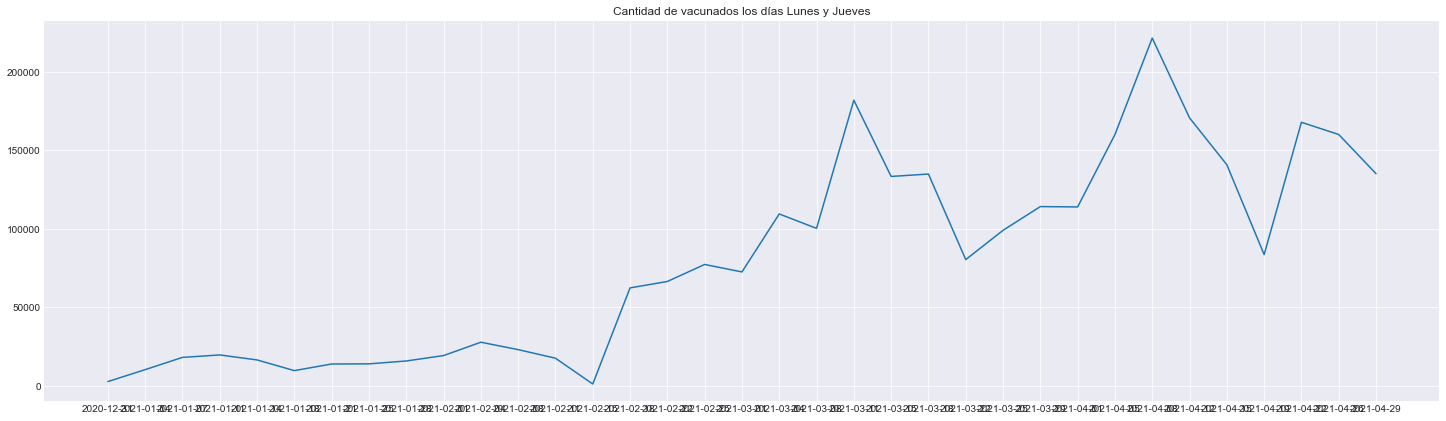

In [638]:
# Graficar cantidad vacunada por fecha, color por vacuna, forma por grupo etario
x = fechas_vacunas[fechas_vacunas.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]
y = data_vacunas.fecha_aplicacion[data_vacunas.fecha_aplicacion.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])].groupby(data_vacunas.fecha_aplicacion).count().sort_index()
plt.figure(figsize = (25,7))
plt.title('Cantidad de vacunados los días Lunes y Jueves')
#plt.xticks(rotation=45)
plt.plot(x, y, label = 'Vacunados')

In [373]:
import matplotlib.dates as mdates

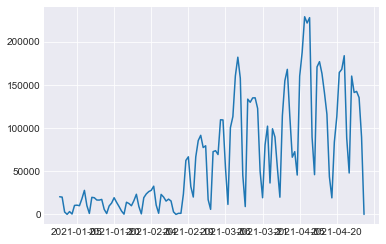

In [396]:
fig, ax = plt.subplots()
ax.plot(fechas_vacunas, data_vacunas.fecha_aplicacion.groupby(data_vacunas.fecha_aplicacion).count().sort_index())
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

In [191]:
print(plt.style.available)
plt.style.use('seaborn-dark')

In [714]:
x = totales.fecha_diag[totales.fecha_diag.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]

In [ ]:
y_conf = totales['Cantidad Confirmados'][totales.fecha_diag[totales.fecha_diag.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]]
y_test = totales['Cantidad Testeados'][totales.fecha_diag[totales.fecha_diag.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]]
y_vac = totales['Vacunados'][totales.fecha_diag[totales.fecha_diag.isin([x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()])]]

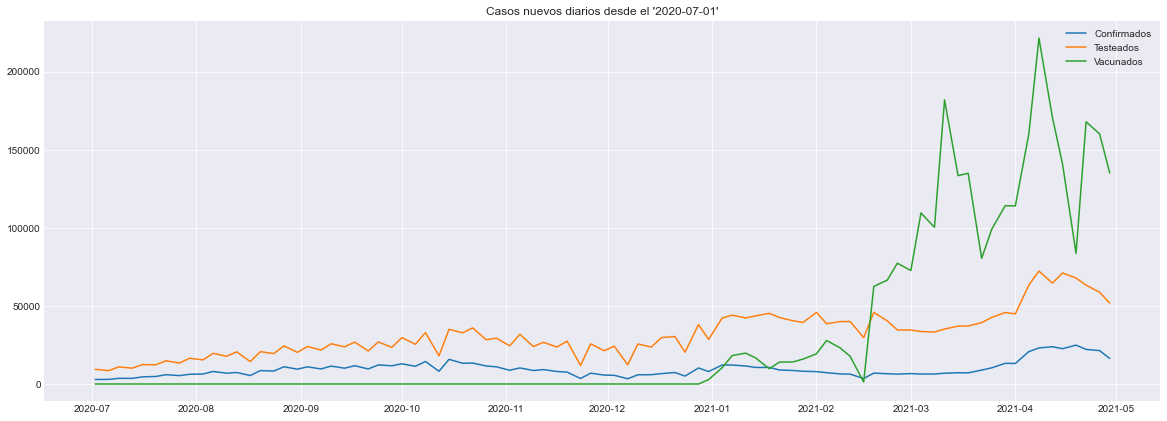

In [778]:
# Plot
plt.figure(figsize = (20,7))
plt.style.use('seaborn-darkgrid')
plt.plot(x, y_conf, label = 'Confirmados')
plt.plot(x, y_test, label = 'Testeados')
plt.plot(x, y_vac, label = 'Vacunados')
#plt.legend(loc='upper left')
plt.title("Casos nuevos diarios desde el '2020-07-01'")
plt.legend()
plt.ticklabel_format(style='plain', axis="y")
#plt.xticks(ticks=[x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()], rotation=45)
plt.show()

TypeError: 'DatetimeIndex' object is not callable

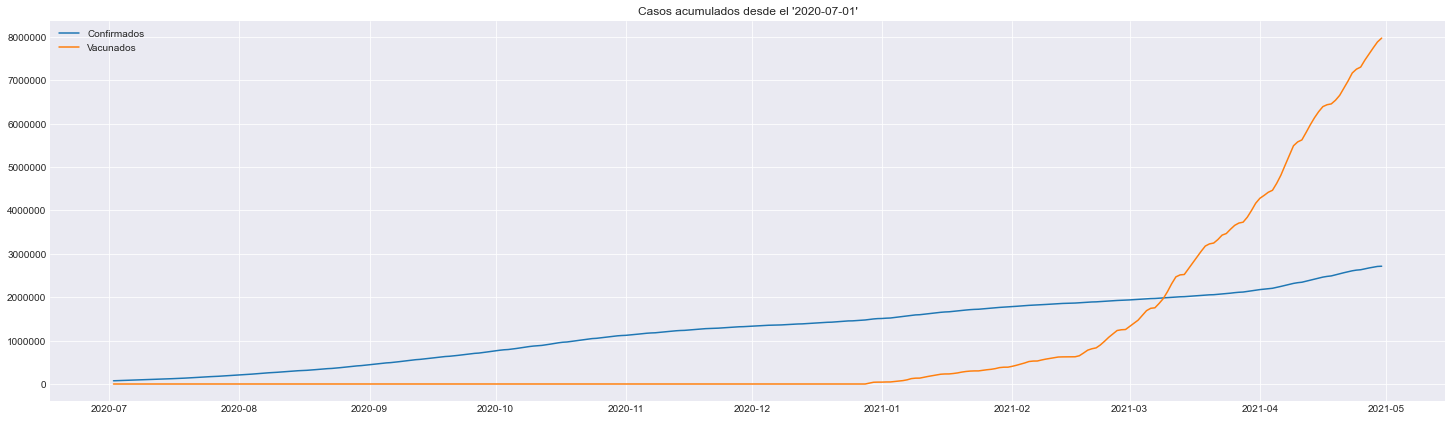

In [781]:
# Plot
x = totales['Cantidad Acumulada Confirmados'][totales.index > '2020-07-01'].index
y = totales['Cantidad Acumulada Confirmados'][totales.index > '2020-07-01']
y2 = totales['Vacunados Acumulados'][totales.index > '2020-07-01']
plt.figure(figsize = (25,7))
plt.style.use('seaborn-darkgrid')
plt.plot(x, y, label = 'Confirmados acumulados')
plt.plot(y2, label='Vacunados acumulados')
#plt.legend(loc='upper left')
plt.title("Casos y vacunación acumuladas desde el '2020-07-01'")
plt.ticklabel_format(style='plain', axis="y")
plt.legend()
plt.xticks(ticks=[x for x in pd.Series(dates)[pd.Series(dates)>'2020-07-01'].sort_values()], rotation=45)
plt.show()

In [44]:
xticks = pd.to_datetime(["2020-04-01","2020-05-01","2020-06-01","2020-07-01","2020-08-01","2020-09-01"])

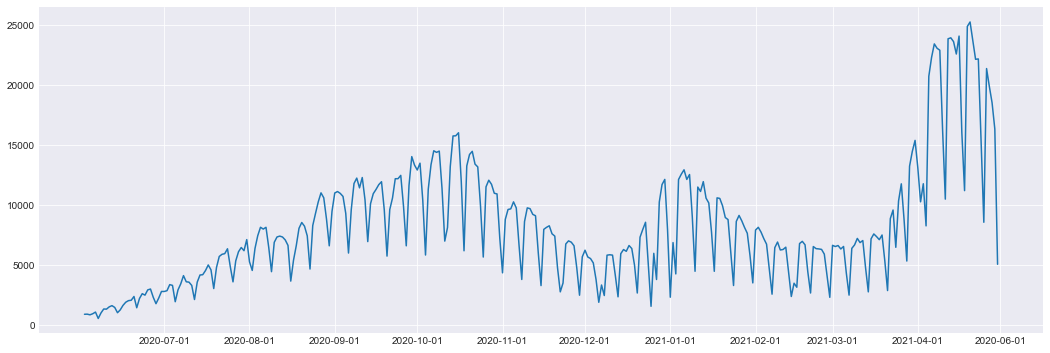

Hoy en día, bajando a 22000 casos confirmados por día aproximadamente.


In [46]:
plt.figure(figsize = (18,6))
plt.style.use('seaborn-darkgrid')
plt.plot(tot[tot.index > '2020-06-01'])
#plt.figure(figsize = (18,6))
plt.xticks(ticks = ["2020-06-01","2020-07-01","2020-08-01","2020-09-01","2020-10-01","2020-11-01","2020-12-01","2021-01-01","2021-02-01","2021-03-01","2021-04-01"])
plt.show()
print("Hoy en día, bajando a 22000 casos confirmados por día aproximadamente.")
print('Resta agregar linea con cantidad de testeos')

In [47]:
prim_trim_inf = tot.index[tot.index > '2020-06-01'].sort_values()
prim_trim_sup = tot.index[tot.index < '2020-09-01'].sort_values()
seg_trim_inf = tot.index[tot.index > '2020-09-01'].sort_values()
seg_trim_sup = tot.index[tot.index < '2020-12-01'].sort_values()
ter_trim_inf = tot.index[tot.index > '2020-12-01'].sort_values()
#ter_trim_sup = tot.index > '2020-12-01'

In [49]:
#pd.Series(tot[ter_trim_inf])[10:]

In [50]:
data.clasificacion_resumen[data.fecha_apertura == "2021-04-30"].value_counts()

Sospechoso    15073
Descartado     8979
Confirmado     8499
Name: clasificacion_resumen, dtype: int64

In [51]:
data.clasificacion_resumen[data.fecha_diagnostico == "2021-04-30"].value_counts()

Descartado    5447
Confirmado    5087
Sospechoso    1811
Name: clasificacion_resumen, dtype: int64

In [52]:
data.fecha_fallecimiento[data.fecha_fallecimiento == "2021-04-30"].value_counts()

2021-04-30    27
Name: fecha_fallecimiento, dtype: int64

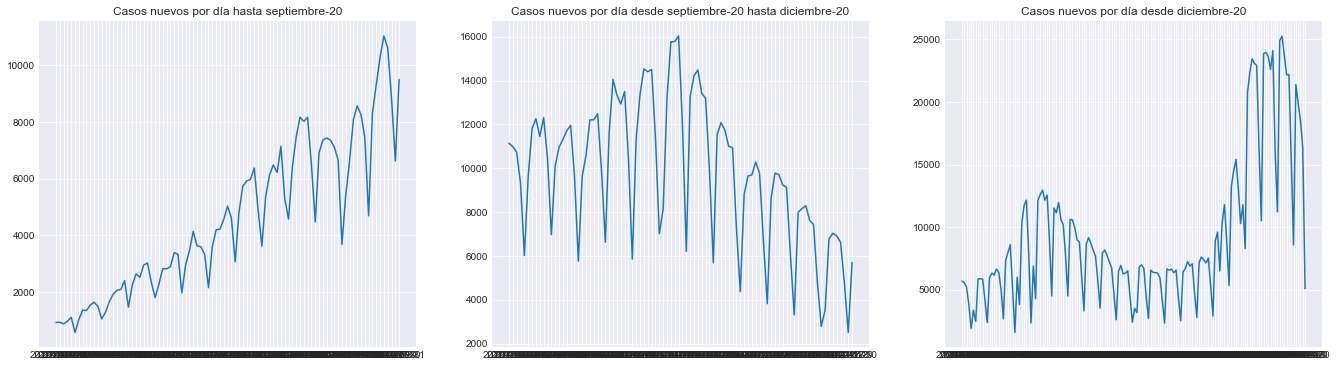

In [53]:
plt.figure(figsize = (23,6))
plt.subplot(1, 3, 1)
plt.title("Casos nuevos por día hasta septiembre-20")
#plt.xticks(ticks=xticks)
plt.plot(tot[prim_trim_inf&prim_trim_sup])
plt.subplot(1, 3, 2)
plt.title("Casos nuevos por día desde septiembre-20 hasta diciembre-20")
plt.plot(tot[seg_trim_inf&seg_trim_sup])
plt.subplot(1, 3, 3)
plt.title("Casos nuevos por día desde diciembre-20")
plt.plot(tot[ter_trim_inf])

In [60]:
i = datetime.fromisoformat('2020-04-23')
dates_12_2 = []
while i < datetime.today() - timedelta(days=3):
    dates_12_2.append(i)
    i += timedelta(days=7)

In [455]:
dates[:2]

['2020-06-04', '2020-06-07']

In [61]:
for date in dates_12_2:
    date = datetime.isoformat(date)[:10]
dates_12_2 = [datetime.isoformat(date) for date in dates_12_2]
dates_12_2 = [date[:10] for date in dates_12_2]

In [192]:
#data.fecha_diagnostico.dropna(inplace=True)

In [66]:
mdata = pd.to_datetime(data.fecha_diagnostico[data.clasificacion_resumen=="Confirmado"]).dt.month
mdata.dropna(inplace=True)
mdata = mdata.astype(str)

C:\Users\bruno\anaconda3\envs\dhdsblend37\lib\site-packages\pandas\core\series.py:4494: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  self._update_inplace(result)


In [67]:
mcordata = []
for x in mdata:
    mcordata.append(x.replace(".0",""))

In [68]:
adata = pd.to_datetime(data.fecha_diagnostico[data.clasificacion_resumen=="Confirmado"]).dt.year
adata.dropna(inplace=True)
adata= adata.astype(str)

In [69]:
acordata = []
for x in adata:
    acordata.append(x.replace(".0",""))

In [70]:
data["Date"] = pd.Series(acordata)+"_"+pd.Series(mcordata)

In [71]:
data_graf = data["Date"].dropna()
data_graf

0          2021_4
1          2021_4
2          2021_4
3          2021_4
4          2021_4
            ...  
2714171    2021_4
2714172    2021_4
2714173    2021_4
2714174    2021_4
2714175    2021_4
Name: Date, Length: 2707244, dtype: object

In [ ]:
data_graf = pd.to_datetime(data_graf, format="%Y_%m")
data_graf = pd.DataFrame(data_graf)
data_graf["ano"] = pd.Series
data_graf["ano"] = data_graf["Date"].dt.year
data_graf["mes"] = data_graf["Date"].dt.month
data_graf = data_graf[data_graf.ano>=2019]

In [75]:
count = data_graf.groupby([data_graf["ano"],data_graf.mes]).count().rename({"Date":"Cant"},axis="columns")#.sort_values(by="Date",axis=0)
#count = count[count.Cant > 1]
count

Cant
ano  mes        
2019 3         1
     9         1
     10        7
     11        1
2020 1        63
     2         8
     3      1087
     4      3397
     5     12838
     6     51074
     7    135312
     8    228606
     9    317517
     10   364141
     11   209391
     12   179710
2021 1    266444
     2    156521
     3    230635
     4    550485

In [77]:
count.query("ano==2021")

Cant
ano  mes        
2021 1    266444
     2    156521
     3    230635
     4    550485

In [78]:
cant_2019 = pd.DataFrame(count.query("ano==2019"))
cant_2020 = pd.DataFrame(count.query("ano==2020"))
cant_2021 = pd.DataFrame(count.query("ano==2021"))

<AxesSubplot:xlabel='ano,mes'>

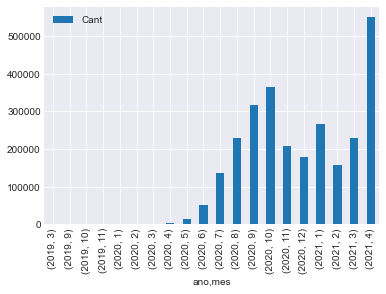

In [79]:
count.plot(kind="bar")

In [80]:
data.fecha_diagnostico = pd.to_datetime(data.fecha_diagnostico,infer_datetime_format=True)

In [81]:
data.fecha_diagnostico.isna().value_counts()

False    9205623
True      683149
Name: fecha_diagnostico, dtype: int64

In [82]:
today = datetime.strftime(datetime.date(datetime.today()),"%Y-%m-%d")

In [83]:
per_15d = datetime.strftime(datetime.date(datetime.today()-timedelta(days=15)),"%Y-%m-%d")
per_15d

'2021-04-16'

In [84]:
activos = data[data.fecha_diagnostico>=per_15d]
activos = activos.loc[:,["sexo","edad","carga_provincia_nombre","fallecido","clasificacion","clasificacion_resumen"]]
activos = activos[activos.clasificacion_resumen == "Confirmado"]
activos.head(5)

,sexo,edad,carga_provincia_nombre,fallecido,clasificacion,clasificacion_resumen
151,F,27.0,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
213,M,18.0,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
233,M,41.0,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
322,F,29.0,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
360,M,33.0,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado


In [85]:
activos.fallecido.value_counts()

NO    273721
SI      1206
Name: fallecido, dtype: int64

In [86]:
data.fallecido.loc[(data.clasificacion_resumen=="Descartado") | (data.clasificacion_resumen=="Sospechoso")].value_counts()

NO    6902203
SI      13028
Name: fallecido, dtype: int64

In [87]:
pd.cut(activos.edad,5).value_counts(normalize=True)

(21.8, 42.6]     0.461820
(42.6, 63.4]     0.314079
(0.896, 21.8]    0.119490
(63.4, 84.2]     0.096303
(84.2, 105.0]    0.008309
Name: edad, dtype: float64

In [88]:
pd.cut(data.edad,5).value_counts(normalize=True)

(10.0, 35.0]       0.423688
(35.0, 60.0]       0.404508
(60.0, 85.0]       0.118328
(-15.125, 10.0]    0.041121
(85.0, 110.0]      0.012355
Name: edad, dtype: float64

In [89]:
activos.sexo.value_counts(normalize=True)

M     0.497965
F     0.495695
NR    0.006340
Name: sexo, dtype: float64

In [90]:
activos.clasificacion.value_counts()

Caso confirmado por laboratorio - No activo (por tiempo de evolución)                        132773
Caso confirmado por laboratorio - Activo                                                     131895
Caso confirmado por laboratorio - Activo Internado                                             6814
Caso confirmado por criterio clínico-epidemiológico - No activo (por tiempo de evolución)      1243
Caso confirmado por laboratorio - Fallecido                                                    1204
Caso confirmado por laboratorio - No Activo por criterio de laboratorio                         494
Caso confirmado por criterio clinico-epidemiol¿gico - Activo                                    449
Caso confirmado por criterio clínico - epidemiológico -  Activo internado                        53
Caso confirmado por criterio clínico-epidemiologico - Fallecido                                   2
Name: clasificacion, dtype: int64

In [92]:
activos.head(3)

,sexo,edad,carga_provincia_nombre,fallecido,clasificacion,clasificacion_resumen
151,F,27.0,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
213,M,18.0,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado
233,M,41.0,CABA,NO,Caso confirmado por laboratorio - No activo (p...,Confirmado


In [94]:
print ("Las provincias que más casos activos tienen son:")
activos.carga_provincia_nombre.value_counts()[:5]

Las provincias que más casos activos tienen son:


Buenos Aires    103158
CABA             59356
Santa Fe         23427
Córdoba          20589
Mendoza          11139
Name: carga_provincia_nombre, dtype: int64

In [239]:
print ("Cantidad de casos confirmados en últimos 15 días:",activos.carga_provincia_nombre.count())
print ("Cantidad de casos analizados en últimos 15 días:",data[data.fecha_diagnostico>per_15d].shape[0])
print ("Lo que representa un",round(activos.carga_provincia_nombre.count()/data[data.fecha_diagnostico>per_15d].shape[0],2),"% de casos positivos sobre los testeos realizados")

Cantidad de casos confirmados en últimos 15 días: 67843
Cantidad de casos analizados en últimos 15 días: 400108
Lo que representa un 0.17 % de los testeos realizados


In [95]:
# Representado en línea anterior a Abril-21
print ("Cantidad de casos confirmados en últimos 15 días:",activos.carga_provincia_nombre.count())
print ("Cantidad de casos analizados en últimos 15 días:",data[data.fecha_diagnostico>per_15d].shape[0])
print ("Lo que representa un",round(activos.carga_provincia_nombre.count()/data[data.fecha_diagnostico>per_15d].shape[0],2),"% de casos positivos sobre los testeos realizados")

Cantidad de casos confirmados en últimos 15 días: 274927
Cantidad de casos analizados en últimos 15 días: 719921
Lo que representa un 0.38 % de casos positivos sobre los testeos realizados


In [258]:
print ("Porcentaje de casos analizados por provincia sobre últimos 15 días hasta el:", today)
round(data.carga_provincia_nombre[data.fecha_diagnostico>per_15d].value_counts()/data.carga_provincia_nombre[data.fecha_diagnostico>per_15d].count()*100,2)[:5]

Porcentaje de casos analizados por provincia sobre últimos 15 días hasta el 08/3:


CABA            40.75
Buenos Aires    19.27
Córdoba         11.44
Santa Fe         4.57
Tucumán          2.65
Name: carga_provincia_nombre, dtype: float64

In [96]:
# Representado en línea anterior a Marzo-21
print ("Porcentaje de casos analizados por provincia sobre últimos 15 días hasta el:", today)
round(data.carga_provincia_nombre[data.fecha_diagnostico>per_15d].value_counts()/data.carga_provincia_nombre[data.fecha_diagnostico>per_15d].count()*100,2)[:5]

Porcentaje de casos analizados por provincia sobre últimos 15 días hasta el: 2021-05-01


CABA            27.74
Buenos Aires    27.36
Córdoba         10.93
Santa Fe         6.55
San Luis         3.97
Name: carga_provincia_nombre, dtype: float64

In [259]:
print ("Porcentaje de casos confirmados por provincia sobre últimos 15 días hasta el:", today)
round(activos.carga_provincia_nombre.value_counts()/activos.carga_provincia_nombre.count()*100,2)[:5]

Porcentaje de casos confirmados por provincia sobre últimos 15 días hasta el 08/3:


Buenos Aires    33.64
CABA            18.95
Córdoba         10.54
Santa Fe         6.68
Corrientes       3.12
Name: carga_provincia_nombre, dtype: float64

In [97]:
# Representado en línea anterior a Marzo-21
print ("Porcentaje de casos confirmados por provincia sobre últimos 15 días hasta el:", today)
round(activos.carga_provincia_nombre.value_counts()/activos.carga_provincia_nombre.count()*100,2)[:5]

Porcentaje de casos confirmados por provincia sobre últimos 15 días hasta el: 2021-05-01


Buenos Aires    37.52
CABA            21.59
Santa Fe         8.52
Córdoba          7.49
Mendoza          4.05
Name: carga_provincia_nombre, dtype: float64

In [98]:
print ("Porcentaje de casos analizados en total por provincia hasta el:", today)
round(data.carga_provincia_nombre.value_counts()/data.carga_provincia_nombre.count()*100,2)[:5]

Porcentaje de casos analizados en total por provincia hasta el: 2021-05-01


CABA            29.55
Buenos Aires    26.81
Córdoba         11.09
Santa Fe         5.99
Tucumán          3.38
Name: carga_provincia_nombre, dtype: float64

In [99]:
print ("Porcentaje de casos confirmados por provincia sobre total hasta el:", today)
round(data[data.clasificacion_resumen=="Confirmado"].carga_provincia_nombre.value_counts()/data[data.clasificacion_resumen=="Confirmado"].carga_provincia_nombre.count()*100,2)[:5]

Porcentaje de casos confirmados por provincia sobre total hasta el: 2021-05-01


Buenos Aires    36.57
CABA            18.72
Santa Fe         9.28
Córdoba          7.58
Tucumán          3.58
Name: carga_provincia_nombre, dtype: float64

In [102]:
data_graf2 = data.loc[:,['fecha_diagnostico','clasificacion_resumen']]
data_graf2.dropna(inplace=True)
data_graf2 = pd.DataFrame(data_graf2)
data_graf2['semana'] = data_graf2["fecha_diagnostico"].dt.week
data_graf2.sample(10)

,fecha_diagnostico,clasificacion_resumen,semana
4156788,2020-11-03,Confirmado,45
7178394,2021-02-04,Confirmado,5
4457052,2020-11-11,Confirmado,46
3717231,2020-10-18,Confirmado,42
3158193,2020-09-27,Descartado,39
158030,2021-04-12,Descartado,15
4612483,2020-11-17,Descartado,47
823350,2021-04-20,Descartado,16
6104320,2021-01-04,Descartado,1
1764321,2020-07-18,Descartado,29


In [103]:
data_graf2.fecha_diagnostico = pd.to_datetime(data_graf2.fecha_diagnostico, format="%Y-%m-$d")
data_graf2 = data_graf2[data_graf2["fecha_diagnostico"].dt.year>=2021]

In [106]:
data_graf2.sample(5)

,fecha_diagnostico,clasificacion_resumen,semana
9024515,2021-03-23,Descartado,12
7241952,2021-02-03,Confirmado,5
6476242,2021-01-18,Descartado,3
7557257,2021-02-04,Descartado,5
6643375,2021-01-21,Confirmado,3


In [107]:
data_graf2.semana[data_graf2.semana==53] = 1

In [108]:
count2_conf_week = data_graf2.loc[:,['fecha_diagnostico']][data_graf2.clasificacion_resumen=='Confirmado'].groupby(data_graf2["semana"]).count().rename({"fecha_diagnostico":"Cantidad_Confirmados"},axis="columns")
count2_conf_week

,Cantidad_Confirmados
semana,
1,89459
2,67670
3,58292
4,51651
5,45119
6,39366
7,34350
8,38027
9,39690


In [109]:
count2_tot_week = data_graf2.loc[:,['fecha_diagnostico']].groupby(data_graf2["semana"]).count().rename({"fecha_diagnostico":"Cantidad_Testeados"},axis="columns")
# Era igual a:
# data_graf2.semana.value_counts().sort_index()
count2_tot_week

,Cantidad_Testeados
semana,
1,339986
2,288072
3,271650
4,270087
5,263162
6,259448
7,248448
8,240783
9,215481


In [110]:
data_graf_week = pd.DataFrame(count2_conf_week)

In [111]:
data_graf_week['Cantidad_Total'] = count2_tot_week

In [112]:
data_graf_week

,Cantidad_Confirmados,Cantidad_Total
semana,,
1,89459,339986
2,67670,288072
3,58292,271650
4,51651,270087
5,45119,263162
6,39366,259448
7,34350,248448
8,38027,240783
9,39690,215481


<function matplotlib.pyplot.show(close=None, block=None)>

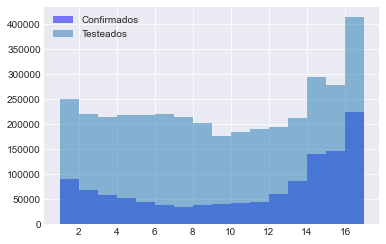

In [113]:
plt.hist(data_graf2.semana[data_graf2.clasificacion_resumen=='Confirmado'], bins=16, alpha = 0.5, label = 'Confirmados', color= 'blue')
plt.hist(data_graf2.semana[data_graf2.clasificacion_resumen!='Confirmado'], bins=16, alpha = 0.5, label = 'Testeados')
plt.legend()
plt.show

In [114]:
data.clasificacion_resumen[data.clasificacion_resumen=='Confirmado'].count()/data.clasificacion_resumen[data.clasificacion_resumen!='Confirmado'].count()

0.42994896082291995

In [782]:
# Mortalidad en rango 15-30

In [ ]:
rango_joven = np.logical_and(data.edad<31, data.edad>14)
len(data.fallecido[rango_joven])

In [ ]:
# Cantidad de vacunados por rango etario